In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

import time
from selenium import webdriver
# for headless
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import json

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'}



# url = 'https://www.dell.com/community/PowerEdge-Hardware-General/PowerEdge-R730XD-Loading-BIOS-Drivers/m-p/7644944#M65318'
url = 'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW'
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text, 'html.parser')

print(soup.title.text)


	PowerEdge Hardware General - Dell Community



# Selenium vCookie_3

- using `JavascriptExecutor` to perform the click operation on the "Load more" button


- Also, The `MoveTargetOutOfBoundsException` error can occur when the scroll action goes beyond the bounds of the webpage. To avoid this error, we can try a different approach by scrolling to the bottom of the page using execute_script() and then clicking the "Load more" button.

- rather than print, will save to link_list
- param `num_clicks` which indicates the number of times to click the "Load more" button

## Filter list `links`


- rather than print, will save to `link_list`
- wil LATER param `num_clicks` which indicates the number of times to click the "Load more" button


Remove:


- `https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW` 


Retain links like the links below:

- `https://www.dell.com/community/PowerEdge-Hardware-General/Dell-R820-dedicated-iDRAC-interface-issues/td-p/8396971/jump-to/first-unread-message` 
- `https://www.dell.com/community/PowerEdge-Hardware-General/Unable-to-upgrade-iDRAC-7-from-2-21-21/td-p/8388296/jump-to/first-unread-message`

# Filter webpage by `Solved` cases

- lets go back and adjust method, to click Filter by Solved first
- 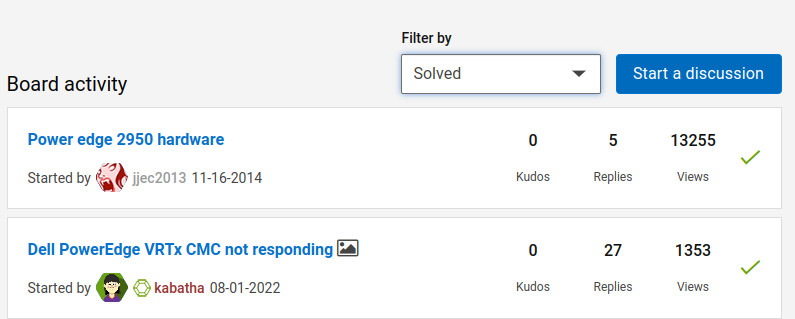

- Right click and `Inspect Element`
- 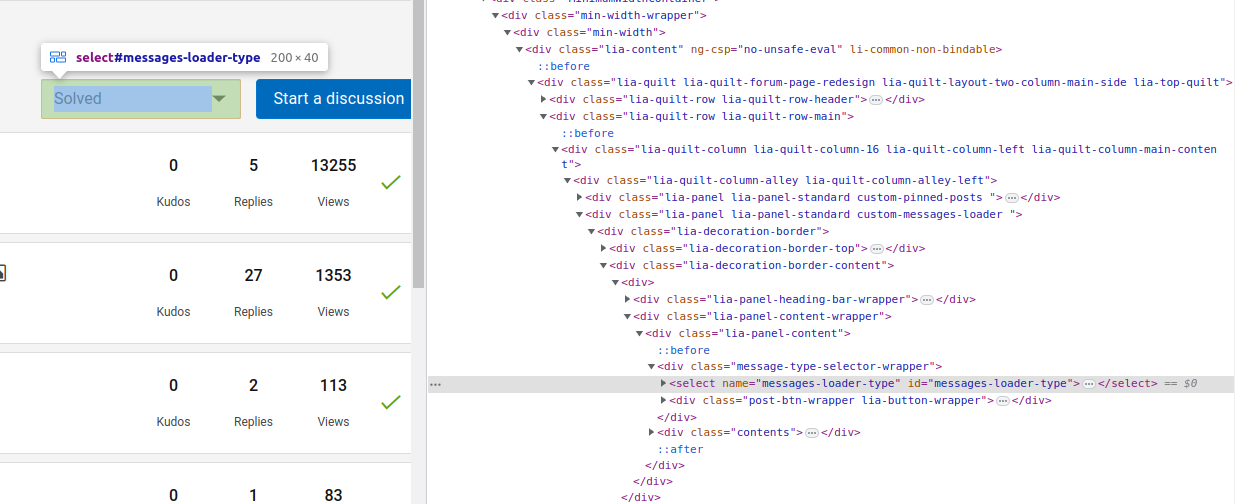

- `<select name="messages-loader-type" id="messages-loader-type"> <option value="recent" selected="">Latest activity</option> <option value="solved">Solved</option> <option value="topkudos">Kudoed</option> </select>`
- `<option value="solved">Solved</option>`


```
    # Select the "Solved" option from the dropdown
    select_element = driver.find_element(By.ID, 'messages-loader-type')
    option_solved = select_element.find_element(By.XPATH, "//option[@value='solved']")
    option_solved.click()
    
```

- As we increase `num_clicks` to be `>90` we hit an error because we are not giving the function enough time to scroll down the increasingly larger webpage `ElementClickInterceptedException`

In [47]:
def automate_dell_forum(num_clicks):
    # Instantiate the Selenium web driver
    driver = webdriver.Chrome()
    driver.maximize_window()  # Maximize the browser window

    # Navigate to the Dell community forum page
    driver.get('https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW')

    # Press the "Accept All" button for cookies
    accept_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//a[@aria-label="allow cookies"]')))
    accept_button.click()
    
    # Select the "Solved" option from the dropdown
    select_element = driver.find_element(By.ID, 'messages-loader-type')
    option_solved = select_element.find_element(By.XPATH, "//option[@value='solved']")
    option_solved.click()

    # Wait for the page to load after selecting "Solved" option
    time.sleep(2)

    # Scroll to the bottom of the page
    print("scrolled outside loop")
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait for a few seconds BEFORE clicking the "Load more" button
    print("wait(2) outside before loop")
    time.sleep(2)
    

    # Click the "Load more" button the specified number of times
    count = 1
    load_more_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, 'btn-load-more')))
    for _ in range(num_clicks):
        print("Waiting... for a few seconds BEFORE clicking the Load more button")
        time.sleep(3)
        print("Wait befor done")
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        print("scrolled in loop at", count)
        time.sleep(3)
        print("waited 2 secs after scroll")
        load_more_button.click()
        count += 1
        print("clicked: ", count)
        print("Waiting... for a few seconds AFTER clicking the Load more button")
        time.sleep(6)
        print("Wait after done")
    
        
    
    # Wait for the page to load AFTER clicking "Load more" button
    #print("Waiting... for a few seconds AFTER clicking the Load more button")
    print("wait(2) outside after loop")

    time.sleep(2)
    
    #print("Wait after done")
    

    # Get all href urls on the page and save them to a list
    urls = driver.find_elements(By.XPATH, '//a[@href]')
    url_list = [url.get_attribute('href') for url in urls]

    # Close the Selenium web driver
    driver.quit()

    return url_list

# Call the method to automate the process and get the url list, num_of_clicks=
url_list = automate_dell_forum(60)

# Print the urls (forum posts)
for url in url_list:
    print(url)

scrolled outside loop
wait(2) outside before loop
Waiting... for a few seconds BEFORE clicking the Load more button
Wait befor done
scrolled in loop at 1
waited 2 secs after scroll
clicked:  2
Waiting... for a few seconds AFTER clicking the Load more button
Wait after done
Waiting... for a few seconds BEFORE clicking the Load more button
Wait befor done
scrolled in loop at 2
waited 2 secs after scroll
clicked:  3
Waiting... for a few seconds AFTER clicking the Load more button
Wait after done
Waiting... for a few seconds BEFORE clicking the Load more button
Wait befor done
scrolled in loop at 3
waited 2 secs after scroll
clicked:  4
Waiting... for a few seconds AFTER clicking the Load more button
Wait after done
Waiting... for a few seconds BEFORE clicking the Load more button
Wait befor done
scrolled in loop at 4
waited 2 secs after scroll
clicked:  5
Waiting... for a few seconds AFTER clicking the Load more button
Wait after done
Waiting... for a few seconds BEFORE clicking the Load 

In [13]:
len(url_list)

3113

# Filtered Solved List

In [49]:
def filtered_urls(url_list):
    filtered_urls = []
    exclude_urls = [
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW#',
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.solutions.href',
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.careers.href',
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/custom.dell.link.about.href',
        'https://www.dell.com/community/PowerEdge-Hardware-General/bd-p/PowerEdge-General-HW'
    ]
    for url in url_list:
        if url.startswith('https://www.dell.com/community/PowerEdge-Hardware-General/') and url not in exclude_urls:
            filtered_urls.append(url)
    return filtered_urls

# Filter the urls
filtered_urls = filtered_urls(url_list)

# Print the filtered urls
#for url in filtered_urls:
#    print(url)


https://www.dell.com/community/PowerEdge-Hardware-General/DELL-EMC-Support-videos/td-p/7529991/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/Configuring-Memory-on-boot-and-that-s-it/td-p/8398511/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/Poweredge-T630-minimum-to-POST-components/td-p/8401484/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/Fatal-Error-occurred-on-server-dell-r730/td-p/8400258/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/PowerEdge-T330-and-T430-and-GTX-1080-Ti/td-p/5086336/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/Adding-SATA-hard-disk-to-T440/td-p/8399572/jump-to/first-unread-message
https://www.dell.com/community/PowerEdge-Hardware-General/CMOS-battery-and-BIOS-settings-on-a-PowerEdge-R430/td-p/8399944/jump-to/first-unread-message
https://www.dell.com/community/

In [53]:
len(filtered_urls)

611



- The first `lia-message-body-content` always references the Question
- The seconnd `lia-message-body-content` is always the pinned answer (for "Solved" forum posts)
- So we will simple combine now, save the first `lia-message-body-content` into `Questions` and the second into `Answers`



# Q & A

- first will be saved as Question
- second saved as Answers
- 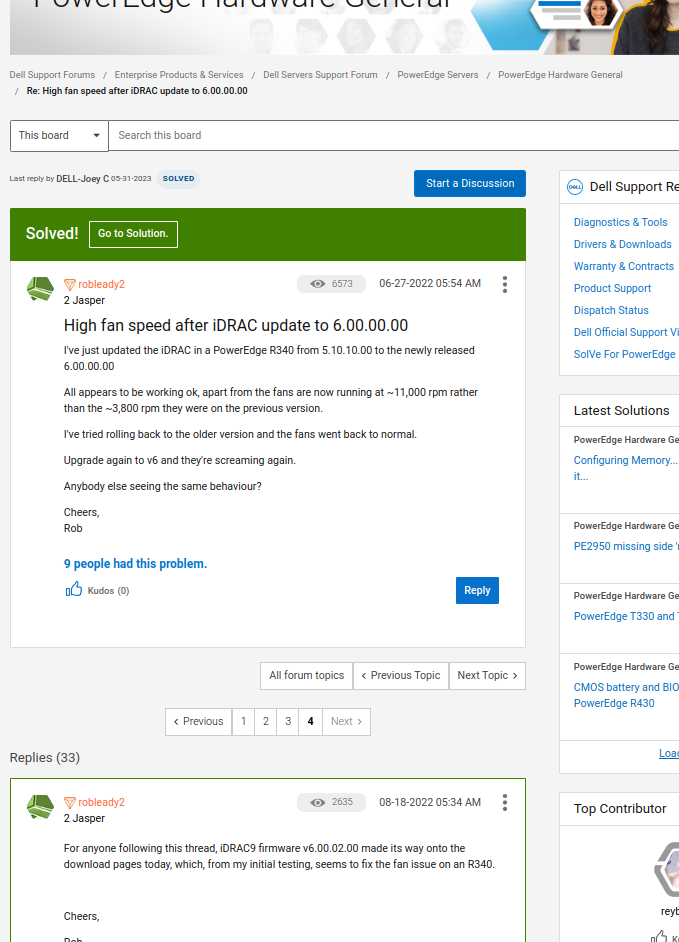


- save as DF
- below solves `ValueError: All arrays must be of the same length` (some `answers` may be blank)

In [54]:
def extract_elements_with_class(urls, class_name):
    elements_list = []
    for url in urls:
        try:
            response = requests.get(url)
            soup = BeautifulSoup(response.content, 'html.parser')
            elements = soup.find_all(class_=class_name)
            if len(elements) >= 1:
                elements_list.append(elements[0].text.strip())
            else:
                elements_list.append("")  # Append an empty string if the first element is not found
            if len(elements) >= 2:
                elements_list.append(elements[1].text.strip())
            else:
                elements_list.append("")  # Append an empty string if the second element is not found
        except requests.exceptions.RequestException:
            # Handle connection errors or invalid URLs
            elements_list.append("")  # Append an empty string if there's an error
    return elements_list

class_name = "lia-message-body-content"

extracted_elements = extract_elements_with_class(filtered_urls, class_name)

# Ensure extracted_elements has an even number of elements
if len(extracted_elements) % 2 != 0:
    extracted_elements.append("")  # Append an empty string to make it even

# Split the extracted elements into Questions and Answers lists
Questions = extracted_elements[::2]
Answers = extracted_elements[1::2]

# Create a dataframe called QA
QA = pd.DataFrame({"Questions": Questions, "Answers": Answers})


In [55]:
QA.head()

Questions  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       We provide you a variety of support related videos on our DELL EMC Support YouTube channel. We publish at least one new video every week so make sure you subscribe and stay up to date with the latest turoials, tipps and tricks about server, storage and networking.\n \nHere are some playlist you might find helpful for your daily business regarding DELL EMC Enterprise hardware.\n\nOpenManage Server Administrator \nRAID - Tutorials, Information and Troubleshooting \nDell EMC QuickTips - something about everything \niDRAC - Setup, Configuration, Troubleshooting \nDell Lifecycle Controller \nSupportAssist Enterprise Virtual Edition \n\nYou can find the full list here.\n \nSomething is missing? Got a topic we should cover in one of our videos? Feel free to suggest new topics and give us feedback to existing ones in this thread.   
1                                                                                                                                                                                                                                                                                     

## testing the pairing

In [4]:
# Set pandas options to display all columns and rows without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [57]:
print(QA.iloc[24])


Questions    Hello,We were asked by DELL supporter to update iDRAC again for a hardware support, from 6.02.00.00 to 6.10.00.00. After updating, the secure web access to iDRAC failed with error:Bad RequestYour browser sent a request that this server could not understand.Additionally, a 400 Bad Request error was encountered while trying to use an ErrorDocument to handle the request.After doing some tests, I have the following conclusions/workarounds:1. the secure web access failed when using the FQDN of iDRAC interface2. using the IP or short hostname works with the secure web access3. setting iDRAC.WebServer.ManualDNSEntry to have the FQDN included won't solve the issue4. disabling idrac.webserver.HostHeaderCheck aslo works, but could not open virtual console viewer I tried to use racadm command 'sslresetcfg' to regenerate the certificate, but only short hostname used as Common Name (CN) and also only the short hostname listed in the DNS alternative name. By the way, we have DNS BMC/RAC

In [15]:
print(filtered_urls[24])

https://www.dell.com/community/PowerEdge-Hardware-General/dell-R740-won-t-initialise-7-68tb-dell-emc-MZ-ILT7T6A/td-p/8386289/jump-to/first-unread-message


## The Question is typed as a title

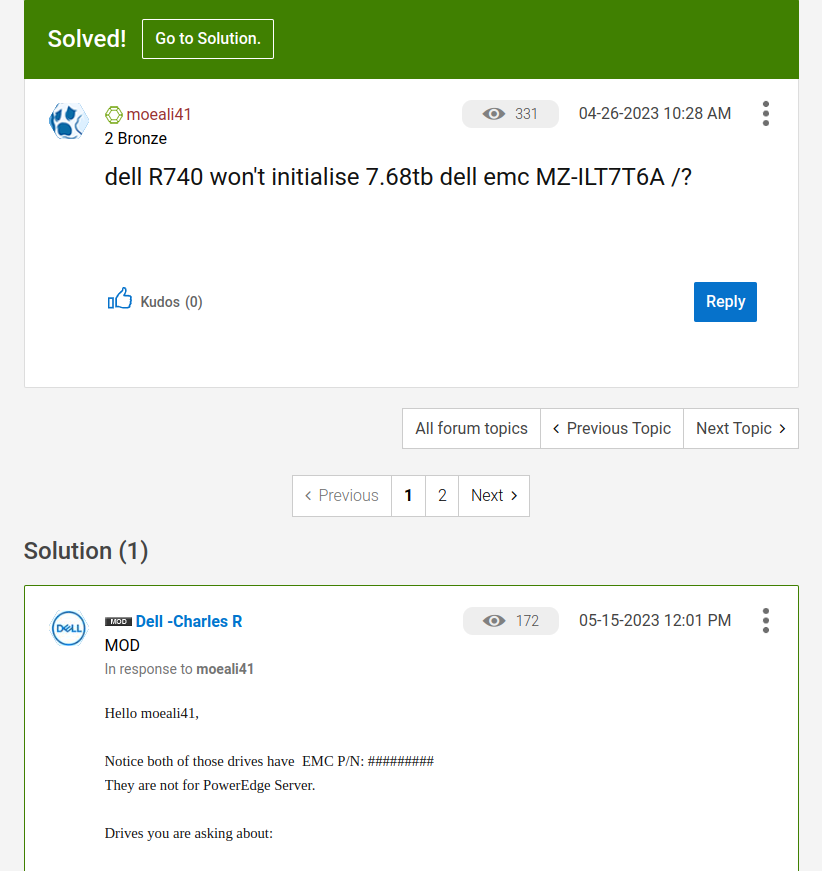

## cleaning dataframe entries

In [58]:
# Create a new dataframe for cleaned data
QA_cleaned = QA.copy()

# Clean up the "Questions" and "Answers" columns
QA_cleaned['Questions'] = QA_cleaned['Questions'].str.replace('Go to Solution', '').str.replace('Solved!', '')
QA_cleaned['Questions'] = QA_cleaned['Questions'].str.replace('\n', '').str.replace('\t', '').str.replace('IWork4Dell', '')
QA_cleaned['Questions'] = QA_cleaned['Questions'].str.replace("Did I answer your query? Please click on ‘Accept as Solution’. ‘Kudo’ the posts you like!", '')

QA_cleaned['Answers'] = QA_cleaned['Answers'].str.replace("Did I answer your query? Please click on ‘Accept as Solution’. ‘Kudo’ the posts you like!", '')
QA_cleaned['Answers'] = QA_cleaned['Answers'].str.replace("View solution in original post", '')
QA_cleaned['Answers'] = QA_cleaned['Answers'].str.replace('\n', '').str.replace('\t', '').str.replace('#IWork4Dell', '')


/tmp/ipykernel_4823/3115642962.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  QA_cleaned['Questions'] = QA_cleaned['Questions'].str.replace("Did I answer your query? Please click on ‘Accept as Solution’. ‘Kudo’ the posts you like!", '')
/tmp/ipykernel_4823/3115642962.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  QA_cleaned['Answers'] = QA_cleaned['Answers'].str.replace("Did I answer your query? Please click on ‘Accept as Solution’. ‘Kudo’ the posts you like!", '')


In [59]:
print(QA_cleaned.iloc[24])

Questions    Hello,We were asked by DELL supporter to update iDRAC again for a hardware support, from 6.02.00.00 to 6.10.00.00. After updating, the secure web access to iDRAC failed with error:Bad RequestYour browser sent a request that this server could not understand.Additionally, a 400 Bad Request error was encountered while trying to use an ErrorDocument to handle the request.After doing some tests, I have the following conclusions/workarounds:1. the secure web access failed when using the FQDN of iDRAC interface2. using the IP or short hostname works with the secure web access3. setting iDRAC.WebServer.ManualDNSEntry to have the FQDN included won't solve the issue4. disabling idrac.webserver.HostHeaderCheck aslo works, but could not open virtual console viewer I tried to use racadm command 'sslresetcfg' to regenerate the certificate, but only short hostname used as Common Name (CN) and also only the short hostname listed in the DNS alternative name. By the way, we have DNS BMC/RAC

In [61]:
QA_cleaned.tail()

,Questions,Answers
605,Greatings all I have had a Dell T320 since 2013 and I would like to upgrade the NIC to 10 GB.I do see that it can take Intel X520 Dual Port 10Gb. This has SFP ports I am looking for a cheap RJ45 version. Does anyone have any ideas or could point me in the right direction.Many thanks .,"PowerEdge T320 does not support 10Gig network controller. You can refer below link for details. It does not mean it will not work. As it is not validated we can not guarantee that it will work.https://www.dell.com/downloads/global/products/pedge/t320_spec_sheet.pdfThanks,DELL-Shine K"
606,"We have VMware ESXi on Dell VRTX blade. It has 8 external port and 16 internal port (4 port * 1 blade). We have connected cables as per below, External port 1 - VLAN 10 (MGMT / vMotion)External port 2 - VLAN 20 (Backup)External port 3 - Trunk portExternal port 4 - Trunk PortExternal port 5 - VLAN 10 (MGMT / vMotion)External port 6 - VLAN 20 (Backup)External port 7 - Trunk portExternal port 8 - Trunk Port Can anyone please let me know how the mapping of external port is happening with internal port at the ESXi level. We can see 4 NIC adaper at each of the ESXi console. Not sure, how they are communicating/mapping with external switch. .","The 2401 is a switch and not a passthrough there is not a one to one mapping, all ports can talk to all of the other ports.Thanks,DELL-Josh CrSocial Media and Communities ProfessionalDell Technologies | Enterprise Support ServicesDid I answer your query? Please click on ‘Accept as Solution’. ‘Kudo’ the posts you like!"
607,"I feel like I'm going to get a painfully obvious answer here, but how do I activate more ports for a blade server in a VRTX chassis?Both my blades have 2 of 4 ports active. If i go into port config in the I/O module GUI, the other two ports show ""down"", but there are no options to bring them up.This makes me think that each blade server would have a setting for how many of the internal NIC ports it uses, but I can't find such a setting anywhere in chassis management GUI.What am I missing?.","HelloI feel like I'm going to get a painfully obvious answer here, but how do I activate more ports for a blade server in a VRTX chassis?You can't enable more of the ports. You only have two available ports per node because of the switch/IOM you are using. The I/O module will only use the first two ports on each node. You will need to change to something other than the IOM to allow access to more ports. I think the IOM is the only available option that has this port restriction, but I have not checked every available option to be sure.ThanksDaniel MysingerDell EMC, Enterprise Engineer"
608,"Prior to changing out the system board in our R630, I thought that I properly Exported the iDRAC8 License.We then swapped out the system board, and changed the Service Tag number to that of the original. I then Imported the license xml file once we got reconnected to the iDRAC. But we are no longer able to console in to the system through the iDRAC and it looks like we haven't got all the proper licenses. How can we get this reenabled without reinstalling the old system board? Here are some pertinent screenshots. Thank you for your help! .","Yes, I think I will be able to delete this through the iDRAC GUI. Thanks so much!"
609,"Hi,We just received 2 x PowerEdge T130s. They both work fine until we add a low powered GPU card to the machine (we need the HDMI output).Now once they get past boot the CPU and case fan kick in at full speed and don't go back down regardless of system load.Any ideas?.",Install the Dell OpenManage BMC utility which contains the IPMI shell. See link: http://www.dell.com/support/home/us/en/19/Drivers/DriversDetails?driverId=YF64X Launch the shell and run the following commands.ipmitool.exe -I lanplus -U root -P calvin -H <iDRAC IP> raw 0x30 0x30 0x01 0x00ipmitool.exe -I lanplus -U root -P calvin -H <iDRAC IP> raw 0x30 0x30 0x02 0xff 0x46


In [3]:
QA_cleaned.info()

NameError: name 'QA_cleaned' is not defined

### convert df to csv

In [63]:
QA_cleaned.to_csv('QA_cleaned.csv', index=False)

# Contexts

save any http link attempt

In [6]:
# Import CSV as df
QA_cleaned = pd.read_csv("QA_cleaned.csv")

In [7]:
QA_cleaned.head(2)

,Questions,Answers
0,"We provide you a variety of support related videos on our DELL EMC Support YouTube channel. We publish at least one new video every week so make sure you subscribe and stay up to date with the latest turoials, tipps and tricks about server, storage and networking. Here are some playlist you might find helpful for your daily business regarding DELL EMC Enterprise hardware.OpenManage Server Administrator RAID - Tutorials, Information and Troubleshooting Dell EMC QuickTips - something about everything iDRAC - Setup, Configuration, Troubleshooting Dell Lifecycle Controller SupportAssist Enterprise Virtual Edition You can find the full list here. Something is missing? Got a topic we should cover in one of our videos? Feel free to suggest new topics and give us feedback to existing ones in this thread.","Hi All,there are 2 new videos up on the channel. As always a Quick Tip Video on Service Tag locations and in addition we show you how to install OMSA on ESXi 6.7And don't forget to like the videos and subscribe to our channel for all the latest updates!"
1,"Hi,I haven't used my PowerEdge T620 in a year or so. When I just turned it ON, it says:Configuring Memory....and that's it. Nothing happens. It has been doing this for 30 minutes now. I remember having done something like this over a year ago and it did the same thing. I believe I waited for hours and then turned it off. Anyhow, does anyone know what the problem could be? I have 64GB installed and maybe I can take out some memory sticks and see what happens. If that is a good idea, I would need to know in which slots I then have to plug in the memory. The manual is a bit funkt when wanting to use 32GB with 8GB sticks... Thanks..","Hi, what Joey means is that if you have a pc, another topic should be opened for it. For T620, I think it's in no post status.You can make drain power at first as a few steps you can try.Drain server flea power and check for any error messages during POST1) Remove any external peripherals from the server2) Turn system off and remove input power from the server3) Hold down power button for 10 seconds with power unplugged and then wait for one minute4) Re-apply input power and turn system on. Please try to min2post https://dell.to/3IIIkVOOne processor (CPU) in socket processor 1One memory module (DIMM) in socket A1One power supply unithttps://dell.to/3IM2lebSystem Board Jumper SettingsFor information on resetting the password jumper to disable a password, see Disabling A Forgotten Password.Table 1. System Board Jumper SettingsJUMPERSETTINGDESCRIPTIONPWRD_EN (default)The password feature is enabled (pins 2–4). The password feature is disabled (pins 4–6). BIOS local access is unlocked at the next AC power cycle.NVRAM_CLR(default)The configuration settings are retained at the next system boot (pins 3–5). The configuration settings are cleared at system boot (pins 1–3).Thanks,Erman ÖzkurtSocial Media and Communities Professional Dell Technologies | Enterprise Support Services Did I answer your query? Please click on ‘Accept as Solution’. ‘Kudo’ the posts you like!"


### v1

In [8]:
# Read the CSV file into a DataFrame
QA_cleaned = pd.read_csv("QA_cleaned.csv")

# Convert the 'Answers' column to string type
QA_cleaned['Answers'] = QA_cleaned['Answers'].astype(str)

# Extract links using regular expression and handle non-string values
QA_cleaned['Context_url'] = QA_cleaned['Answers'].apply(lambda x: re.findall('https://[\S]+', x) if isinstance(x, str) else [])

# Convert the list of links into a single string separated by commas
QA_cleaned['Context_url'] = QA_cleaned['Context_url'].apply(lambda x: ', '.join(x) if x else '')

# Create a new DataFrame called 'QA_docs' with selected columns
QA_docs_v1 = QA_cleaned[['Questions', 'Answers', 'Context_url']].copy()

In [9]:
QA_docs_v1.to_csv('QA_docs_v1.csv', index=False)

In [10]:
QA_docs_v1.head(2)

,Questions,Answers,Context_url
0,"We provide you a variety of support related videos on our DELL EMC Support YouTube channel. We publish at least one new video every week so make sure you subscribe and stay up to date with the latest turoials, tipps and tricks about server, storage and networking. Here are some playlist you might find helpful for your daily business regarding DELL EMC Enterprise hardware.OpenManage Server Administrator RAID - Tutorials, Information and Troubleshooting Dell EMC QuickTips - something about everything iDRAC - Setup, Configuration, Troubleshooting Dell Lifecycle Controller SupportAssist Enterprise Virtual Edition You can find the full list here. Something is missing? Got a topic we should cover in one of our videos? Feel free to suggest new topics and give us feedback to existing ones in this thread.","Hi All,there are 2 new videos up on the channel. As always a Quick Tip Video on Service Tag locations and in addition we show you how to install OMSA on ESXi 6.7And don't forget to like the videos and subscribe to our channel for all the latest updates!",
1,"Hi,I haven't used my PowerEdge T620 in a year or so. When I just turned it ON, it says:Configuring Memory....and that's it. Nothing happens. It has been doing this for 30 minutes now. I remember having done something like this over a year ago and it did the same thing. I believe I waited for hours and then turned it off. Anyhow, does anyone know what the problem could be? I have 64GB installed and maybe I can take out some memory sticks and see what happens. If that is a good idea, I would need to know in which slots I then have to plug in the memory. The manual is a bit funkt when wanting to use 32GB with 8GB sticks... Thanks..","Hi, what Joey means is that if you have a pc, another topic should be opened for it. For T620, I think it's in no post status.You can make drain power at first as a few steps you can try.Drain server flea power and check for any error messages during POST1) Remove any external peripherals from the server2) Turn system off and remove input power from the server3) Hold down power button for 10 seconds with power unplugged and then wait for one minute4) Re-apply input power and turn system on. Please try to min2post https://dell.to/3IIIkVOOne processor (CPU) in socket processor 1One memory module (DIMM) in socket A1One power supply unithttps://dell.to/3IM2lebSystem Board Jumper SettingsFor information on resetting the password jumper to disable a password, see Disabling A Forgotten Password.Table 1. System Board Jumper SettingsJUMPERSETTINGDESCRIPTIONPWRD_EN (default)The password feature is enabled (pins 2–4). The password feature is disabled (pins 4–6). BIOS local access is unlocked at the next AC power cycle.NVRAM_CLR(default)The configuration settings are retained at the next system boot (pins 3–5). The configuration settings are cleared at system boot (pins 1–3).Thanks,Erman ÖzkurtSocial Media and Communities Professional Dell Technologies | Enterprise Support Services Did I answer your query? Please click on ‘Accept as Solution’. ‘Kudo’ the posts you like!","https://dell.to/3IIIkVOOne, https://dell.to/3IM2lebSystem"


# Testing context urls with DF

In [22]:

# Create an empty list to store the context texts
context_texts = []

# Iterate over each row in the DataFrame
for index, row in QA_docs_v1.iterrows():
    # Get the URL from the 'Context_url' column
    url = row['Context_url']
    
    # Check if the URL starts with 'https://dell.to/'
    if url.startswith('https://dell.to/'):
        # Send a GET request to the URL to retrieve the HTML content
        response = requests.get(url)
        
        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content using BeautifulSoup
            soup = BeautifulSoup(response.content, 'html.parser')
            
            # Extract the text from the parsed HTML
            text = soup.get_text(separator=' ')
            
            # Append the text to the list of context texts
            context_texts.append(text)
            continue
    
    # If the URL doesn't meet the criteria or the request was unsuccessful,
    # append an empty string
    context_texts.append('')
    
# Add the context texts as a new column 'Context' in the DataFrame
QA_docs_v1['Context'] = context_texts


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [23]:
QA_docs_v1.tail(7)

Questions  \
603                                                                                                                                                                                                                                                                                                                                                          My company are planning to upgrade our PowerEdge R520 processor from E5-2407 to E5-2495v2.The question is, can R520 support E5-2695v2 processor?based on r520 owner manual show that it can support "One or two Intel Xeon processor E5-2400 and E5-2400 v2 product family" refer R520 Owner manual . If yes, can I just upgrade the processor or I need to upgrade BIOS firmware that support the processor?If E5-2695v2 processor is not supported can someone suggest or give a list of processor that R520 support.Thanks. .   
604  Hi there,I am receiving the messages and errors below when trying to update the firmware on my Poweredge  R210 II server. I am using Dell Server BIOS PowerEdge R210 II Version 2.8.0 which appears to be the latest version for this BIOS but receive the following messages:*red* Please do not remove the AC power !Insyde flash utility etcFile loading 100%Current BIOS Model name:New BIOS Model name: PowerEdge T110 II*red* Cannot use  a "PowerEdge T110 II" BIOS*red* In a " "*red* Rom update not performedetcI saw the following post for the server in the subject line which has the same message above and points to the server being an OEM box but I am able to open up a support page on the dell.com website using the service tag number on my machine. Any suggestions? Here is the post:http://en.community.dell.com/support-forums/servers/f/956/t/19429285.aspx.   
605                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Greatings all I have had a Dell T320 since 2013 and I would like to upgrade the NIC to 10 GB.I do see that it can take Intel X520 Dual Port 10Gb. This has SFP ports I am looking for a cheap RJ45 version. Does anyone have any ideas or could point me in the right direction.Many thanks  .   
606                                                                                                                                                                                                               We have VMware ESXi on Dell VRTX blade. It has 8 external port and 16 internal port (4 port * 1 blade). We have connected cables as per below, External port 1 - VLAN 10 (MGMT / vMotion)External port 2 - VLAN  20 (Backup)External port 3 -  Trunk portExternal port 4 -   Trunk PortExternal port 5 - VLAN 10 (MGMT / vMotion)External port 6 - VLAN  20 (Backup)External port 7 -  Trunk portExternal port 8 -   Trunk Port Can anyone please let me know how the mapping of external port is happening with internal port at the ESXi level. We can see 4 NIC adaper at each of the ESXi console. Not sure, how they are communicating/mapping with external switch. .   
607                                                                                                                                                                                                                                                                                                                                                                           I feel like I'm going to get a painfully obvious answer here, but how do I activate more ports for a blade server in a VRTX chassis?Both my blades have 2 of 4 po

In [24]:
# Assuming your DataFrame is named QA_docs_v1

# Remove newline characters and extra spacing from the 'Context' column
QA_docs_v1['Context'] = QA_docs_v1['Context'].str.replace('\n', ' ').str.replace('\s+', ' ').str.strip()


/tmp/ipykernel_18118/2866920991.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  QA_docs_v1['Context'] = QA_docs_v1['Context'].str.replace('\n', ' ').str.replace('\s+', ' ').str.strip()


In [29]:
QA_docs_v1.head(15)

Questions  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     We provide you a variety of support related videos on our DELL EMC Support YouTube channel. We publish at least one new video every week so make sure you subscribe and stay up to date with the latest turoials, tipps and tricks about server, storage and networking. Here are some playlist you might find helpful for your daily business regarding DELL EMC Enterprise hardware.OpenManage Server Administrator RAID - Tutorials, Information and Troubleshooting Dell EMC QuickTips - something about everything iDRAC - Setup, Configuration, Troubleshooting Dell Lifecycle Controller SupportAssist Enterprise Virtual Edition You can find the full list here. Something is missing? Got a topic we should cover in one of our videos? Feel free to suggest new topics and give us feedback to existing ones in this thread.   
1                                                                                                                                                                                                                                                                                                                                                                 

In [33]:
# Save the modified DataFrame as a CSV file with the same name
QA_docs_v1.to_csv('QA_test.csv', index=False)


Error: need to escape, but no escapechar set

# JSON


## visit each url and grab the text

In the code snippet provided earlier, `orient='records'` is an argument passed to the `to_dict()` and `to_json()` functions. It specifies the format in which the DataFrame should be converted to a dictionary or JSON.

When orient='records' is used, it means that each row of the DataFrame is converted into a separate dictionary (in the case of to_dict()) or JSON object (in the case of to_json()). Each dictionary or JSON object represents a single record with keys corresponding to the column names and values corresponding to the values in that row.


To print the JSON in a more human-readable format, you can use the indent parameter in the `json.dumps()` function. Here's an updated code snippet that demonstrates this:

In [16]:

# Assuming QA_cleaned is your DataFrame
# You can load your DataFrame from a CSV file or create it programmatically

# Add 'id' column using DataFrame index
QA_cleaned['id'] = QA_cleaned.index

# Convert DataFrame to a dictionary
qa_dict = QA_cleaned.to_dict(orient='records')

# Convert dictionary to JSON with indentation for readability
qa_json = json.dumps(qa_dict, indent=4)

# Print the JSON string
print(qa_json)


[
    {
        "Questions": "We provide you a variety of support related videos on our DELL EMC Support YouTube channel. We publish at least one new video every week so make sure you subscribe and stay up to date with the latest turoials, tipps and tricks about server, storage and networking.\u00a0Here are some playlist you might find helpful for your daily business regarding DELL EMC Enterprise hardware.OpenManage Server Administrator\u00a0RAID - Tutorials, Information and Troubleshooting\u00a0Dell EMC QuickTips - something about everything\u00a0iDRAC - Setup, Configuration, Troubleshooting\u00a0Dell Lifecycle Controller\u00a0SupportAssist Enterprise Virtual Edition\u00a0You can find the full list here.\u00a0Something is missing? Got a topic we should cover in one of our videos? Feel free to suggest new topics and give us feedback to existing ones in this thread.",
        "Answers": "Hi All,there are 2 new videos up on the channel. As always a\u00a0Quick Tip Video on Service Tag loc

### mini json test urls


In this code, we first parse the qa_json string using json.loads() to obtain a list of dictionaries, where each dictionary represents a record.

We then use a list comprehension to extract the Context_url values from each record and store them in the context_urls list.

Next, we create a new dictionary context_url_dict with a key 'Context_urls' and the extracted links as the corresponding value.

After that, we convert the dictionary to JSON format using json.dumps() with indentation.

Finally, we save the JSON to a file named 'context_url_test.json' using the open() function and write the JSON string to the file.

The resulting file, context_url_test.json, will contain the extracted Context_url links in a JSON format.

In [17]:


# Parse the JSON string
qa_records = json.loads(qa_json)

# Extract Context_url links
context_urls = [record['Context_url'] for record in qa_records]

# Create a new dictionary to store the extracted links
context_url_dict = {'Context_urls': context_urls}

# Convert the dictionary to JSON
context_url_json = json.dumps(context_url_dict, indent=4)

# Save the JSON to a file
with open('context_url_test.json', 'w') as file:
    file.write(context_url_json)


In [19]:
print(context_url_json)

{
    "Context_urls": [
        "",
        "https://dell.to/3IIIkVOOne, https://dell.to/3IM2lebSystem",
        "",
        "",
        "",
        "https://dell.to/3OUuxiG",
        "https://dell.to/3WOQlhW, https://dell.to/3qkR527",
        "",
        "",
        "",
        "",
        "",
        "https://www.youtube.com/watch?v=kvSDNAi39YY&ab_channel=JunctionRunner, https://www.reddit.com/r/homelab/comments/bsou3n/dell_r520_idrac_7_swc0700_and_idrac8_prompt/, https://www.reddit.com/r/homelab/comments/a49b4y/r720_idrac_help/, https://winraid.level1techs.com/t/problem-dell-r720xd-idrac-bios-recovery/32658/95",
        "",
        "",
        "",
        "",
        "",
        "https://dell.to/45tJgHmDELL-Young",
        "https://www.computerbase.de/forum/threads/proxmox-rechner-startet-permanent-nach-dem-herunterfahren....GRUB_CMDLINE_LINUX_DEFAULT=\"xhci_hcd.quirks=270336\"https://www.truenas.com/community/threads/kernel-boot-parameter-how-to-add-to-tn-scale.110109/It",
        

remove all double quotes (") using list comprehension (utilize the `replace()` method.

In [36]:

# Parse the JSON string
qa_records = json.loads(qa_json)

# Extract Context_url links and remove double quotes
context_urls = [record['Context_url'].replace('""', '') for record in qa_records]

# Create a new dictionary to store the extracted links
context_url_dict = {'Context_urls': context_urls}

# Convert the dictionary to JSON
context_url_json = json.dumps(context_url_dict, indent=4)

# Save the JSON to a file
with open('context_url_test.json', 'w') as file:
    file.write(context_url_json)


In [38]:
print(context_url_json)

{
    "Context_urls": [
        "",
        "https://dell.to/3IIIkVOOne, https://dell.to/3IM2lebSystem",
        "",
        "",
        "",
        "https://dell.to/3OUuxiG",
        "https://dell.to/3WOQlhW, https://dell.to/3qkR527",
        "",
        "",
        "",
        "",
        "",
        "https://www.youtube.com/watch?v=kvSDNAi39YY&ab_channel=JunctionRunner, https://www.reddit.com/r/homelab/comments/bsou3n/dell_r520_idrac_7_swc0700_and_idrac8_prompt/, https://www.reddit.com/r/homelab/comments/a49b4y/r720_idrac_help/, https://winraid.level1techs.com/t/problem-dell-r720xd-idrac-bios-recovery/32658/95",
        "",
        "",
        "",
        "",
        "",
        "https://dell.to/45tJgHmDELL-Young",
        "https://www.computerbase.de/forum/threads/proxmox-rechner-startet-permanent-nach-dem-herunterfahren....GRUB_CMDLINE_LINUX_DEFAULT=\"xhci_hcd.quirks=270336\"https://www.truenas.com/community/threads/kernel-boot-parameter-how-to-add-to-tn-scale.110109/It",
        

Loop using `url.startswith` (whether a string starts with a specified prefix) to focus first on any url starting with `https://dell.to/`


`string.startswith(prefix, start, end)`

Parameters:

- `prefix `(required): The prefix string that you want to check if the string starts with.
- `start` (optional): The starting index of the string where the checking starts. If not specified, the checking starts from the beginning of the string (index 0).
- `end` (optional): The ending index of the string where the checking stops. If not specified, the checking continues until the end of the string.

Return value:

- The `startswith()` method returns True if the string starts with the specified prefix. Otherwise, it returns False.


In [39]:

# Load the JSON data
context_url_data = json.loads(context_url_json)

# Create a dictionary to store the extracted text
extracted_text_dict = {}

# Loop through the URLs in the JSON data
for url in context_url_data['Context_urls']:
    if url.startswith('https://dell.to/'):
        try:
            # Send a GET request to the URL
            response = requests.get(url)
            
            # Extract the text from the HTML response
            soup = BeautifulSoup(response.content, 'html.parser')
            extracted_text = soup.get_text()
            
            # Store the extracted text in the dictionary
            extracted_text_dict[url] = extracted_text
        except requests.exceptions.RequestException:
            # Handle any exceptions that occur during the request
            extracted_text_dict[url] = 'Error: Failed to fetch the page'
    else:
        # URLs not starting with 'https://dell.to/' are skipped
        extracted_text_dict[url] = 'Skipped: URL does not match the pattern'

# Convert the dictionary to JSON
extracted_text_json = json.dumps(extracted_text_dict, indent=4)

# Save the extracted text JSON to a file
with open('extracted_text.json', 'w') as file:
    file.write(extracted_text_json)


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


printing first entry to avoid `IOPub data rate exceeded.` 

In [51]:
import json

# Assuming extracted_text_json contains the JSON string
# Load the JSON data
json_data = json.loads(extracted_text_json)

# Get an iterator for the dictionary items
iterator = iter(json_data.items())

# Print the desired entries
num_entries = 5  # Number of entries to print
for _ in range(num_entries):
    entry = next(iterator)
    print("Key:", entry[0])
    print("Value:", entry[1])
    print("---")


Key: 
Value: Skipped: URL does not match the pattern
---
Key: https://dell.to/3IIIkVOOne, https://dell.to/3IM2lebSystem
Value: 


Laptops, Monitors, Computers & Storage Solutions | Dell Ireland



































































































































 



Laptops, Monitors, Computers & Storage Solutions | Dell Ireland





Skip to main content









































Sign In














Welcome





Dell Sites

Dell Technologies
Premier Sign In
Partner Program Sign In
Support






My Account
Order Status

My Products





Dell Sites

Dell Technologies
Premier Sign In
Partner Program Sign In
Support







            Sign Out
        




Welcome to Dell
My Account


Place orders quickly and easily
View orders and track your shipping status
Create and access a list of your products



                    Sign In
                

                    Create an Account
                

        

In this code, after loading the JSON data into the json_data dictionary, we retrieve the first entry using the `next()` and `iter()` functions as shown before.

To print the first entry in a more readable format, we use `json.dumps()` with the `indent` parameter set to `4`. This parameter specifies the number of spaces for each level of indentation. Adjust the value of indent to your desired level of indentation.

Finally, we print the formatted entry using print(formatted_entry). This will display the JSON object with proper indentation and line breaks, resulting in a more readable format.

You can apply the same formatting approach to other entries or the entire JSON object as needed.


- using `replace()` method to replace the newline characters
- you can use the `replace()` method iteratively until no more newline characters are found.... will try later

In [62]:
# Load the JSON data
json_data = json.loads(extracted_text_json)

# Specify the desired entry index
entry_index = 3 # The second entry (index 1)

# Iterate over the entries and find the desired entry
for index, entry in enumerate(json_data.items()):
    if index == entry_index:
        # Print the desired entry with proper indentation
        formatted_entry = json.dumps(entry, indent=4)
        formatted_entry = formatted_entry.replace('\n', '').replace('\r', '').replace('\n', '')
        print(formatted_entry)
        break

[    "https://dell.to/3WOQlhW, https://dell.to/3qkR527",    "\n\n\nLaptops, Monitors, Computers & Storage Solutions | Dell Ireland\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\nLaptops, Monitors, Computers & Storage Solutions | Dell Ireland\n\n\n\n\n\nSkip to main content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSign In\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nWelcome\n\n\n\n\n\nDell Sites\n\nDell Technologies\nPremier Sign In\nPartner Program Sign In\nSupport\n\n\n\n\n\n\nMy Account\nOrder Status\n\nMy Products\n\n\n\n\n\nDell Sites\n\nDell Technologies\nPremier Sign In\nPartner Program Sign In\nSupport\n\n\n\n\n\n\n\n            Sign Out\n        \n\n\n\n\nWelcome to Dell\nMy Account\n\n\nPlace orders quickly and easily\nView orders

# Creating a Generative QA Pipeline with PromptNode

https://haystack.deepset.ai/tutorials/22_pipeline_with_promptnode

In [30]:
from haystack.document_stores import InMemoryDocumentStore

document_store = InMemoryDocumentStore(use_bm25=True)


/home/cian/anaconda3/envs/qa/lib/python3.10/site-packages/espnet2/gan_tts/vits/vits.py:43: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(torch.__version__) >= LooseVersion("1.6.0"):
/home/cian/anaconda3/envs/qa/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [31]:
from datasets import load_dataset

dataset = load_dataset("QA_docs_v1", split="train")

document_store.write_documents(dataset)


FileNotFoundError: Couldn't find a dataset script at /home/cian/Projects/DellQA/QA_docs_v1/QA_docs_v1.py or any data file in the same directory. Couldn't find 'QA_docs_v1' on the Hugging Face Hub either: FileNotFoundError: Dataset 'QA_docs_v1' doesn't exist on the Hub. If the repo is private, make sure you are authenticated with `use_auth_token=True` after logging in with `huggingface-cli login`.

In [ ]:
from haystack.nodes import BM25Retriever

retriever = BM25Retriever(document_store=document_store, top_k=2)


In [ ]:
from haystack.nodes import PromptNode, PromptTemplate

lfqa_prompt = PromptTemplate(
    name="lfqa",
    prompt_text="""Synthesize a comprehensive answer from the following text for the given question. 
                             Provide a clear and concise response that summarizes the key points and information presented in the text. 
                             Your answer should be in your own words and be no longer than 50 words. 
                             \n\n Related text: {join(documents)} \n\n Question: {query} \n\n Answer:""",
)

prompt_node = PromptNode(model_name_or_path="google/flan-t5-large", default_prompt_template=lfqa_prompt)


In [ ]:
from haystack.pipelines import Pipeline

pipe = Pipeline()
pipe.add_node(component=retriever, name="retriever", inputs=["Query"])
pipe.add_node(component=prompt_node, name="prompt_node", inputs=["retriever"])


In [ ]:
output = pipe.run(query="How does Rhodes Statue look like?")

print(output["results"])


In [ ]:
examples = [
    "Where is Gardens of Babylon?",
    "Why did people build Great Pyramid of Giza?",
    "How does Rhodes Statue look like?",
    "Why did people visit the Temple of Artemis?",
    "What is the importance of Colossus of Rhodes?",
    "What happened to the Tomb of Mausolus?",
    "How did Colossus of Rhodes collapse?",
]


# KB

- https://www.dell.com/community/Knowledge-Base/tkb-p/EN-TKB